
## Atribut Dataset
- Pregnancies               : Untuk menyatakan Jumlah kehamilan
- Glucose                   : Tingkat Glukosa dalam darah 2 jam dalam tes toleransi glukosa oral
- BloodPressure             : Tekanan darah diastolik (mm Hg)
- SkinThickness             : Ketebalan lipatan kulit pada triceps (mm)
- insulin                   : Tingkat insulin dalam darah 
- BMI                       : Indeks massa tubuh (berat badan dalam kg/(tinggi dalam m)^2)
- DiabetesPedigreeFunction  : Presentase keturunan diabetes
- Age                       : Umur (tahun)
- Outcome                   : Menyatakan hasil akhir 1 adalah Ya (terkena diabetes) dan 0 adalah Tidak (tidak terkena diabetes)


## Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Info mengenai dataset diabetes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Cek missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# Jumlah baris dan kolom
df.shape

(768, 9)

In [27]:
# Kolom yang ada di dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Data Visualization

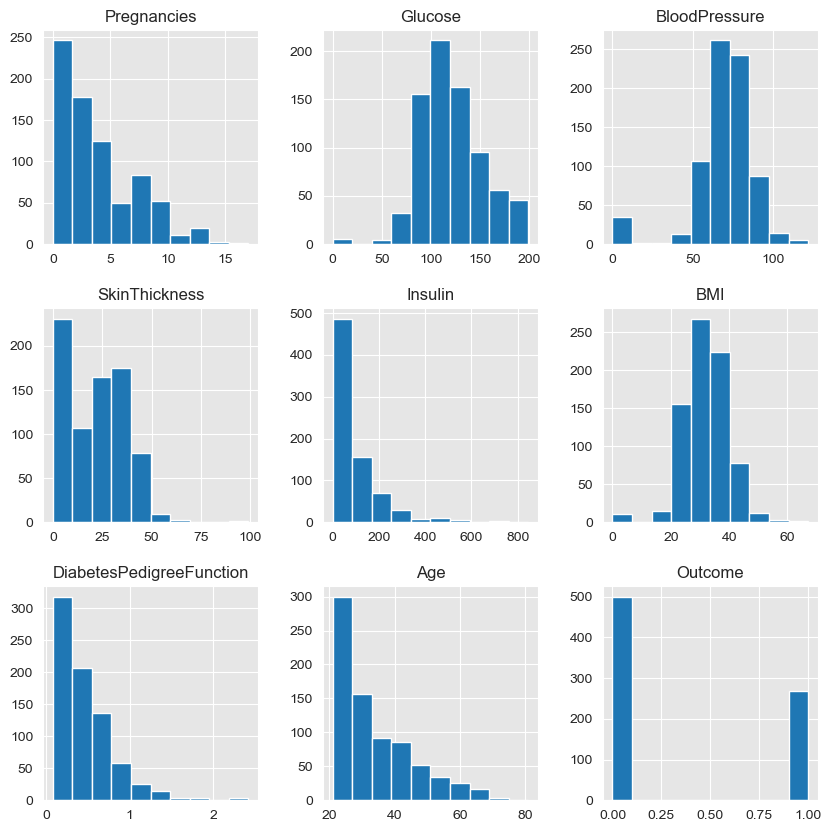

In [28]:
# histogram
df.hist(figsize=(10,10))
plt.show()

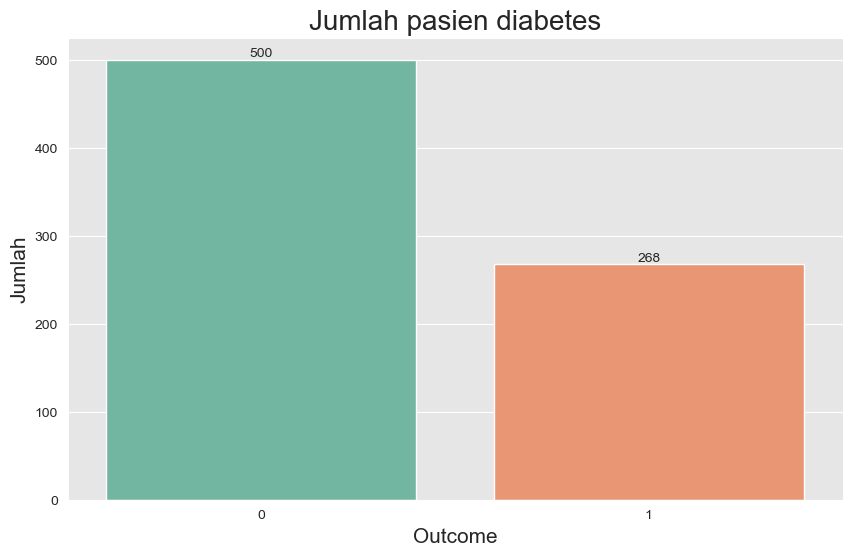

In [29]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', data=df, palette='Set2')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien diabetes', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()


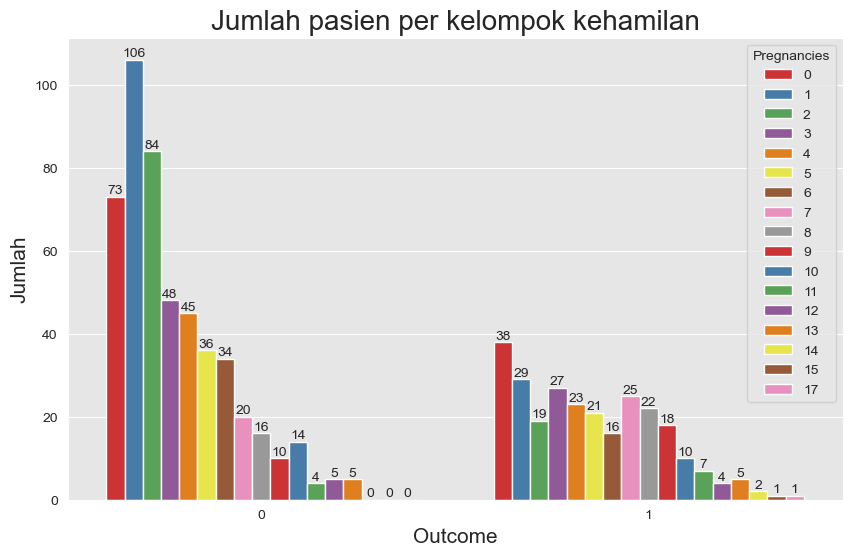

In [30]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='Pregnancies', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok kehamilan', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show() 

In [31]:
age_grup = []
for i in df['Age']:
    if i >= 17 and i <= 25:
        age_grup.append('Remaja Akhir')
    elif i >= 26 and i <= 35:
        age_grup.append('Dewasa Awal')
    elif i >= 36 and i <= 45:
        age_grup.append('Dewasa Akhir')
    elif i >= 46 and i <= 55:
        age_grup.append('Lansia Awal')
    elif i >= 56 and i <= 65:
        age_grup.append('Lansia Akhir')
    else:
        age_grup.append('Manula')
df['Age_grup'] = age_grup

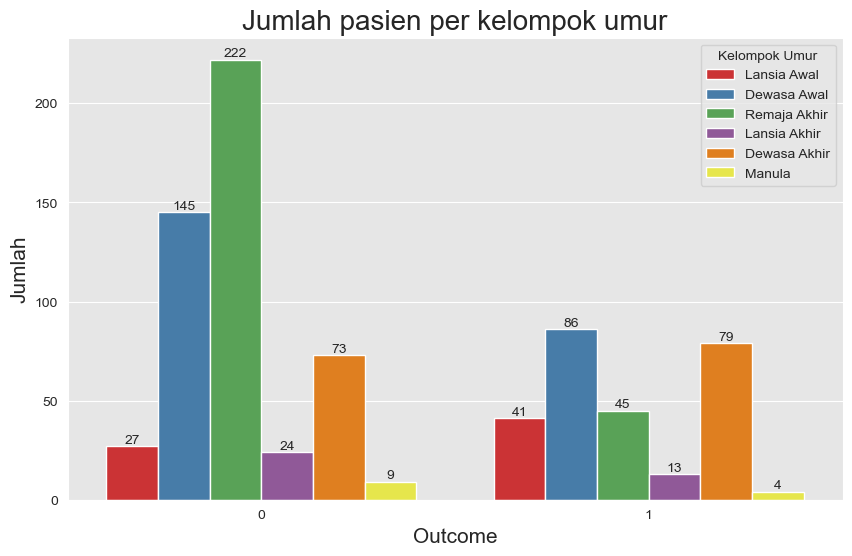

In [32]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='Age_grup', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok umur', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15) 
plt.legend(loc='upper right', title='Kelompok Umur')  
plt.show() 

In [33]:
BMI_grup = []
for i in df['BMI']:
    if i >= 0 and i <= 18.5:
        BMI_grup.append('Kurus')
    elif i >= 18.6 and i <= 22.9:
        BMI_grup.append('Normal')
    elif i >= 23 and i <= 24.9:
        BMI_grup.append('Gemuk')
    elif i >= 25 and i <= 29.9:
        BMI_grup.append('Obesitas')
    else:
        BMI_grup.append('Obesitas II')            


In [34]:
df['BMI_grup'] = BMI_grup
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_grup,BMI_grup
0,6,148,72,35,0,33.6,0.627,50,1,Lansia Awal,Obesitas II
1,1,85,66,29,0,26.6,0.351,31,0,Dewasa Awal,Obesitas
2,8,183,64,0,0,23.3,0.672,32,1,Dewasa Awal,Gemuk
3,1,89,66,23,94,28.1,0.167,21,0,Remaja Akhir,Obesitas
4,0,137,40,35,168,43.1,2.288,33,1,Dewasa Awal,Obesitas II
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Lansia Akhir,Obesitas II
764,2,122,70,27,0,36.8,0.340,27,0,Dewasa Awal,Obesitas II
765,5,121,72,23,112,26.2,0.245,30,0,Dewasa Awal,Obesitas
766,1,126,60,0,0,30.1,0.349,47,1,Lansia Awal,Obesitas II


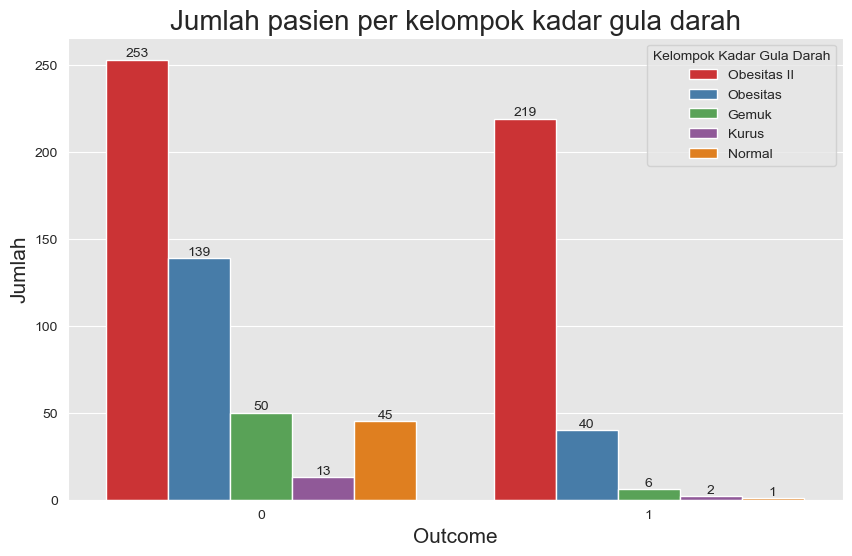

In [35]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='BMI_grup', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok kadar gula darah', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.legend(loc='upper right', title='Kelompok Kadar Gula Darah')
plt.show()    

## Outlier Detection

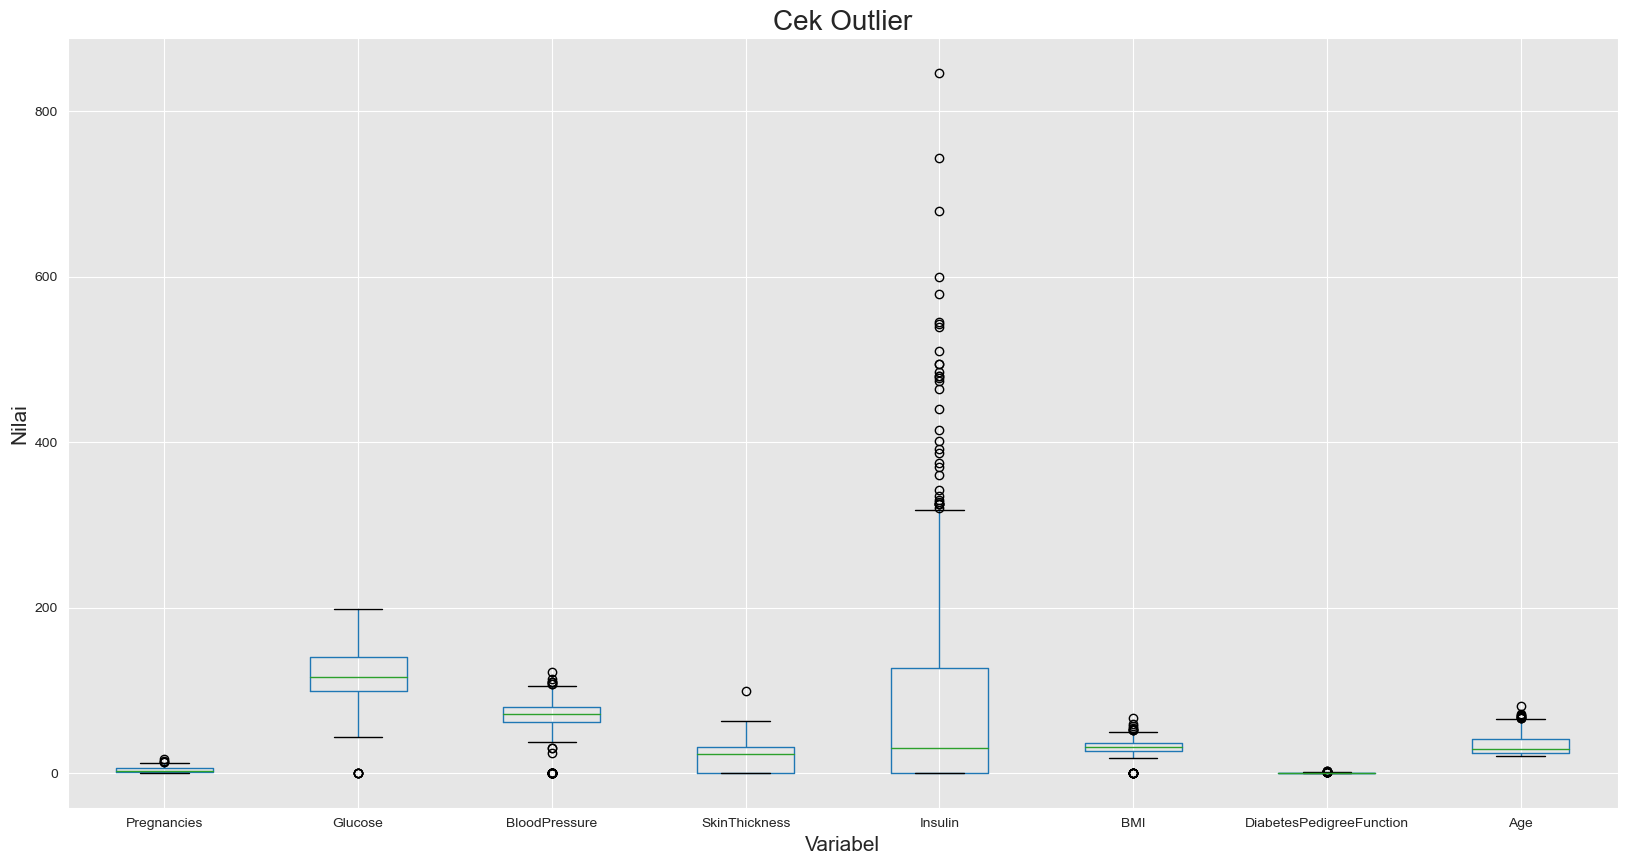

In [36]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols].boxplot(figsize=(20,10))
plt.title('Cek Outlier', fontsize=20)
plt.xlabel('Variabel', fontsize=15)
plt.ylabel('Nilai', fontsize=15)
plt.show()

In [37]:
# Cek outlier
# Cek Outlier dengan IQR
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas
    for i in data:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    print('Outlier (',col,') : ',len(data_outlier[col]),' outlier',data_outlier[col])

Outlier ( Pregnancies ) :  2  outlier (-6.5, 13.5)
Outlier ( Glucose ) :  2  outlier (37.125, 202.125)
Outlier ( BloodPressure ) :  2  outlier (35.0, 107.0)
Outlier ( SkinThickness ) :  2  outlier (-48.0, 80.0)
Outlier ( Insulin ) :  2  outlier (-190.875, 318.125)
Outlier ( BMI ) :  2  outlier (13.35, 50.550000000000004)
Outlier ( DiabetesPedigreeFunction ) :  2  outlier (-0.32999999999999996, 1.2)
Outlier ( Age ) :  2  outlier (-1.5, 66.5)


In [38]:
# Handling insulin
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['Insulin'] = np.where(df['Insulin'] > batas_atas, batas_atas, df['Insulin'])
df['Insulin'] = np.where(df['Insulin'] < batas_bawah, batas_bawah, df['Insulin'])

batas_bawah :  -190.875
batas_atas :  318.125


In [39]:
# Handling blodplassure
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['BloodPressure'] = np.where(df['BloodPressure'] > batas_atas, batas_atas, df['BloodPressure'])
df['BloodPressure'] = np.where(df['BloodPressure'] < batas_bawah, batas_bawah, df['BloodPressure'])

batas_bawah :  35.0
batas_atas :  107.0


In [40]:
# Handling skinthickness
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['SkinThickness'] = np.where(df['SkinThickness'] > batas_atas, batas_atas, df['SkinThickness'])
df['SkinThickness'] = np.where(df['SkinThickness'] < batas_bawah, batas_bawah, df['SkinThickness'])

batas_bawah :  -48.0
batas_atas :  80.0


In [41]:
# Handling BMI
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['BMI'] = np.where(df['BMI'] > batas_atas, batas_atas, df['BMI'])
df['BMI'] = np.where(df['BMI'] < batas_bawah, batas_bawah, df['BMI'])

batas_bawah :  13.35
batas_atas :  50.550000000000004


In [42]:
# Handling Glucose
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['Glucose'] = np.where(df['Glucose'] > batas_atas, batas_atas, df['Glucose'])
df['Glucose'] = np.where(df['Glucose'] < batas_bawah, batas_bawah, df['Glucose'])

batas_bawah :  37.125
batas_atas :  202.125


In [43]:
# Handling Age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['Age'] = np.where(df['Age'] > batas_atas, batas_atas, df['Age'])
df['Age'] = np.where(df['Age'] < batas_bawah, batas_bawah, df['Age'])

batas_bawah :  -1.5
batas_atas :  66.5


In [44]:
# handling diabetespedigreefunction
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] > batas_atas, batas_atas, df['DiabetesPedigreeFunction'])
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] < batas_bawah, batas_bawah, df['DiabetesPedigreeFunction'])

batas_bawah :  -0.32999999999999996
batas_atas :  1.2


In [45]:
# Handling Pregnancies
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['Pregnancies'] = np.where(df['Pregnancies'] > batas_atas, batas_atas, df['Pregnancies'])
df['Pregnancies'] = np.where(df['Pregnancies'] < batas_bawah, batas_bawah, df['Pregnancies'])

batas_bawah :  -6.5
batas_atas :  13.5


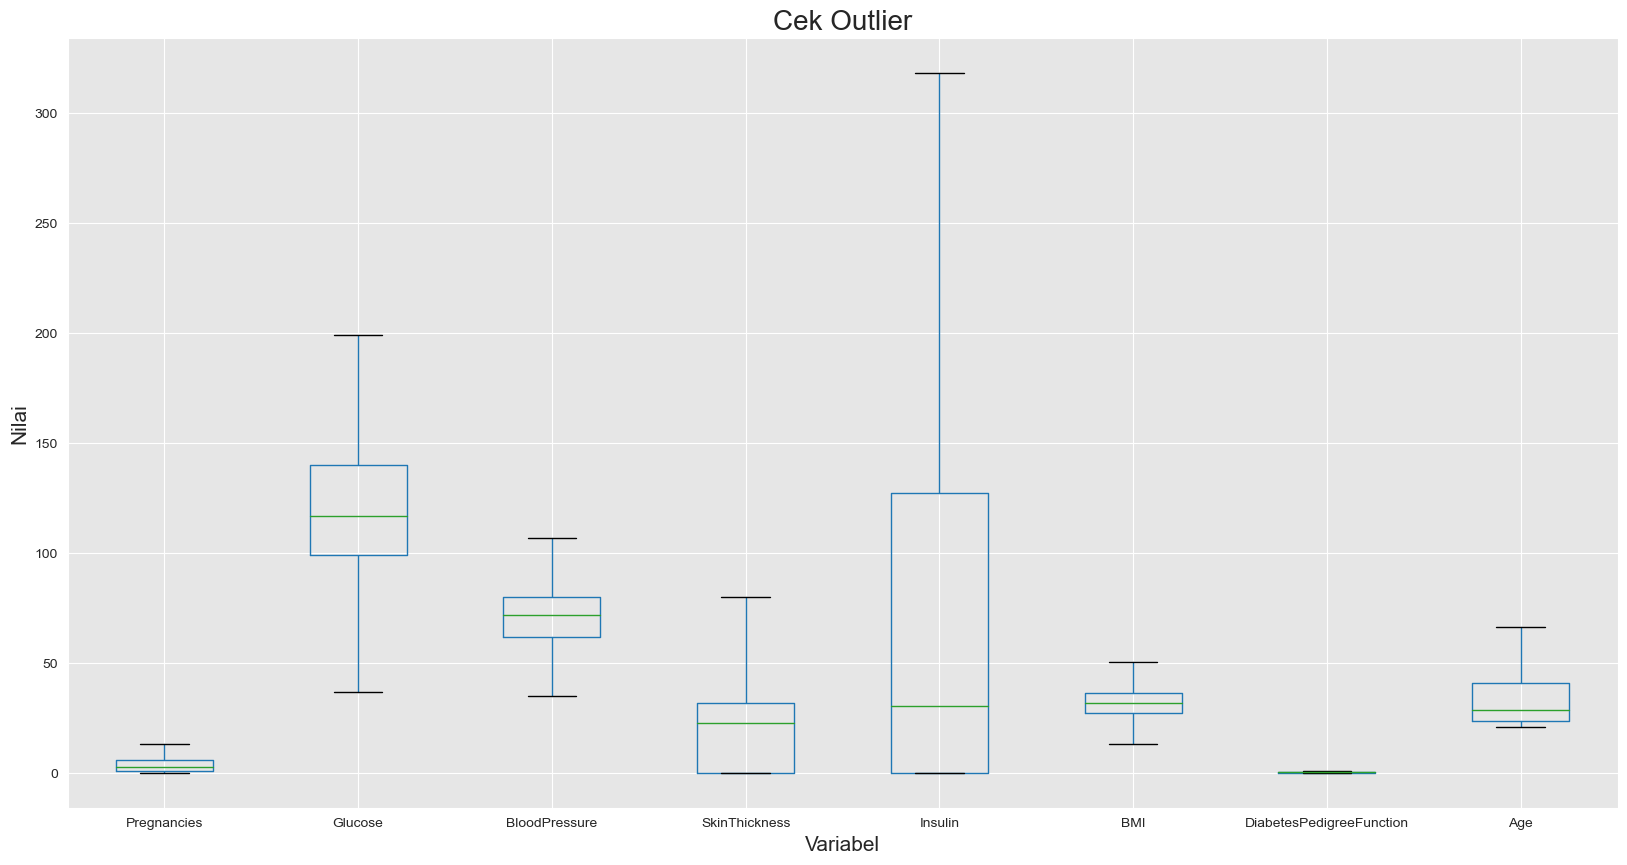

In [46]:
# Setelah di handling
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols].boxplot(figsize=(20,10))
plt.title('Cek Outlier', fontsize=20)
plt.xlabel('Variabel', fontsize=15)
plt.ylabel('Nilai', fontsize=15)
plt.show()

## Data Preprocessing

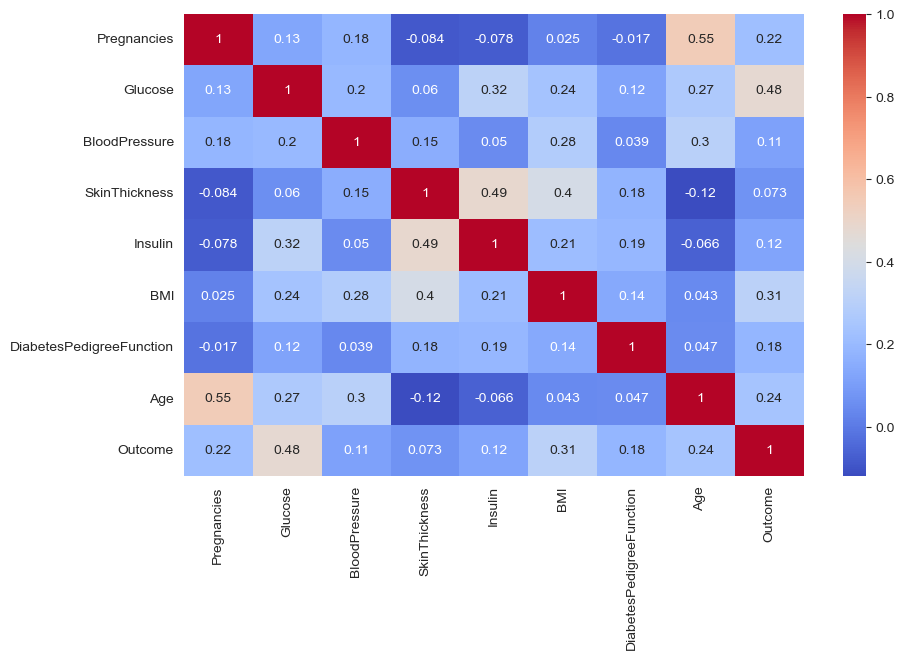

In [47]:
# Cek korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [91]:
# Simpan dataset
df.to_csv('diabetes_clean.csv', index=False)

In [49]:
# Train test split
X = df.drop(['Outcome', 'Age_grup', 'BMI_grup'], axis=1)
y = df['Outcome']

## Oversampling

In [50]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [51]:
# Imbalance data
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X, y = smote.fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 500), (1, 500)]


## Feature Scaling

In [52]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.44444444 0.68494208 0.51388889 ... 0.54435484 0.48930481 0.63736264]
 [0.07407407 0.2957529  0.43055556 ... 0.3561828  0.24331551 0.21978022]
 [0.59259259 0.9011583  0.40277778 ... 0.26747312 0.52941176 0.24175824]
 ...
 [0.42237764 0.73272874 0.22783606 ... 0.52382321 0.55568067 0.37115412]
 [0.42775742 0.5291527  0.66197344 ... 0.46289363 0.29866335 0.08311195]
 [0.40970235 0.70598953 0.56264343 ... 0.81742171 0.1512444  0.36513405]]


## Splitting Dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [54]:
X_train

array([[0.07407407, 0.38841699, 0.43055556, ..., 0.50134409, 0.32620321,
        0.46153846],
       [0.44144574, 0.65430414, 0.70608431, ..., 0.4807093 , 0.19479337,
        0.65502459],
       [0.2962963 , 0.5984556 , 0.51388889, ..., 0.28091398, 0.17736185,
        0.85714286],
       ...,
       [0.07407407, 0.83320463, 0.45833333, ..., 0.78091398, 0.55614973,
        0.15384615],
       [0.07407407, 0.30810811, 0.59722222, ..., 0.57123656, 0.02049911,
        0.02197802],
       [0.2962963 , 0.2957529 , 0.31944444, ..., 0.38844086, 0.20320856,
        0.15384615]])

In [55]:
y_train

390    0
847    1
93     1
236    1
858    1
      ..
118    0
334    0
409    1
225    0
482    0
Name: Outcome, Length: 640, dtype: int64

In [56]:
# Total data
print('Total data X         : ', len(X))
print('Total data y         : ', len(y))
print('=====================================')
# Train data
print('Total data X_train   : ', len(X_train))
print('Total data y_train   : ', len(y_train))
print('=====================================')
# Validation data
print('Total data X_val     : ', len(X_val))
print('Total data y_val     : ', len(y_val))
print('=====================================')
# Test data
print('Total data X_test    : ', len(X_test))
print('Total data y_test    : ', len(y_test))

Total data X         :  1000
Total data y         :  1000
Total data X_train   :  640
Total data y_train   :  640
Total data X_val     :  160
Total data y_val     :  160
Total data X_test    :  200
Total data y_test    :  200


## Modeling

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression
# Model SVM
from sklearn.svm import SVC

### Logistic Regression

In [58]:
model_lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=100)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [59]:
preds_lr = model_lr.predict(X_test)
preds_lr[-5:]

array([1, 1, 0, 0, 1], dtype=int64)

### Cross Validation

In [60]:
def pred_and_plot(input, target, name=''):
    predict = model_lr.predict(input)
    print('Accuracy Score : ', accuracy_score(predict, target))
    print('Precision Score : ', precision_score(predict, target))
    print('Recall Score : ', recall_score(predict, target))

    cm = confusion_matrix(predict, target, normalize='true')
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.title('Confusion Matrix ' + name, fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()


Accuracy Score :  0.7546875
Precision Score :  0.7492163009404389
Recall Score :  0.7563291139240507


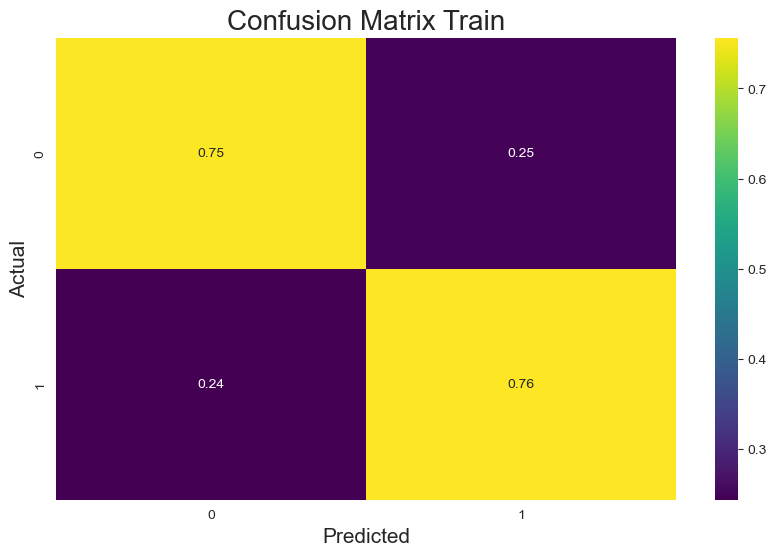

In [61]:
pred_and_plot(X_train,  y_train, 'Train')

Accuracy Score :  0.775
Precision Score :  0.8415841584158416
Recall Score :  0.7456140350877193


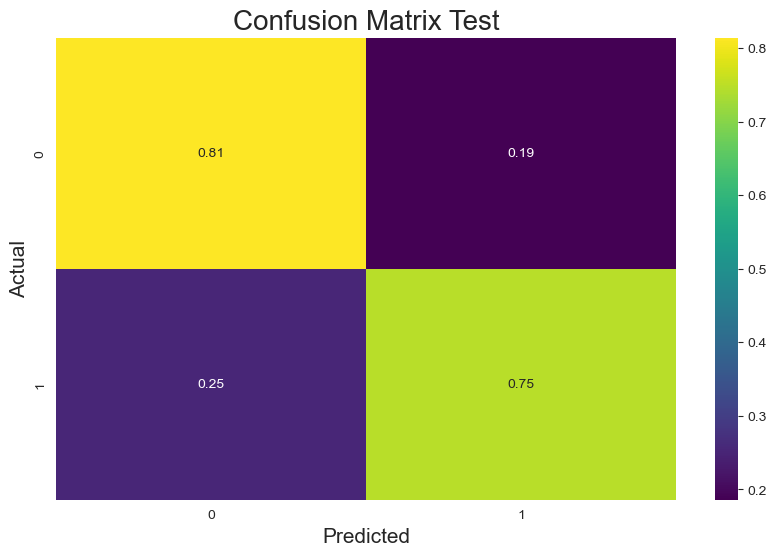

In [62]:
test_lr = pred_and_plot(X_test, y_test, 'Test')

Accuracy Score :  0.7375
Precision Score :  0.7
Recall Score :  0.7567567567567568


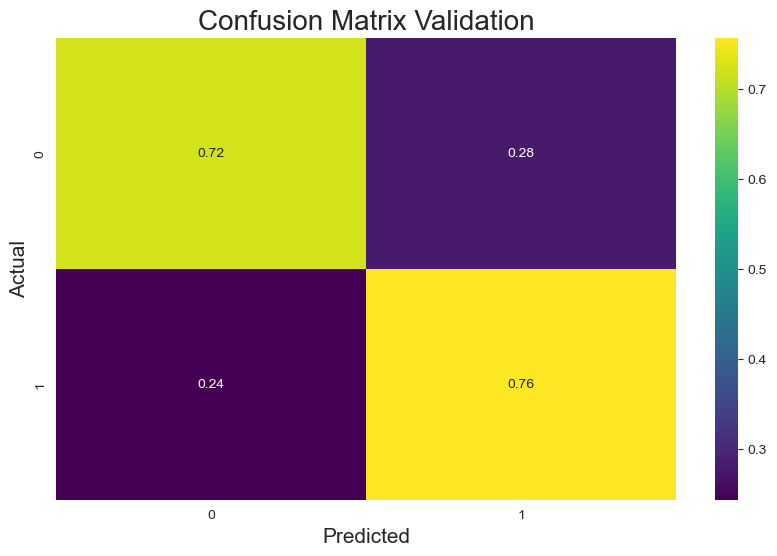

In [63]:
val_lr = pred_and_plot(X_val, y_val, 'Validation')

### Basic Validation

In [64]:
def roc_curve_func(test, predd, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(test, predd)
  roc_auc = roc_auc_score(test, predd)


  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [65]:
y_pred_proba = model_lr.predict_proba(X_train)[:,1]

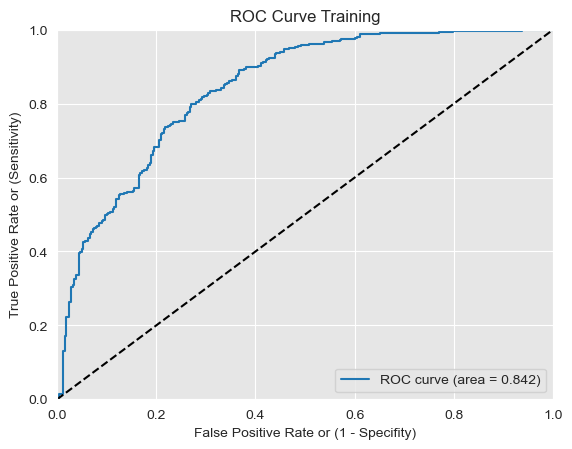

In [66]:
roc_curve_func(y_train,y_pred_proba,'Training')

In [67]:
y_test_pred_proba_lr = model_lr.predict_proba(X_test)[:,1]

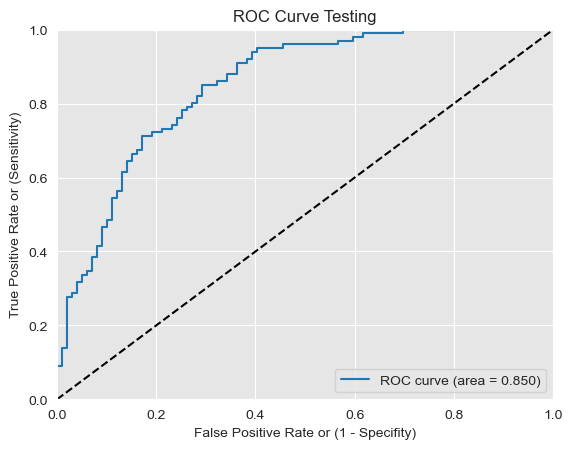

In [68]:
roc_curve_func(y_test, y_test_pred_proba_lr, 'Testing')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.75      0.84      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [70]:
# Tingkat Error Model Logistic Regression Mae
mae_lr = mean_absolute_error(y_test, preds_lr)
print('Mean Absolute Error : ', mae_lr)

Mean Absolute Error :  0.225


### Support Vector Machine

In [71]:
model_svm = SVC(C=100, gamma=1, kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

SVC(C=100, gamma=1, probability=True)

In [72]:
preds_svm = model_svm.predict(X_test)
preds_svm[-5:]

array([1, 1, 0, 1, 1], dtype=int64)

### Cross Validation

In [73]:
def pred_and_plot(input, target, name=''):
    predict = model_svm.predict(input)
    print('Accuracy Score : ', accuracy_score(predict, target))
    print('Precision Score : ', precision_score(predict, target))
    print('Recall Score : ', recall_score(predict, target))

    cm = confusion_matrix(predict, target, normalize='true')
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.title('Confusion Matrix ' + name, fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()

Accuracy Score :  0.91875
Precision Score :  0.9184952978056427
Recall Score :  0.9184952978056427


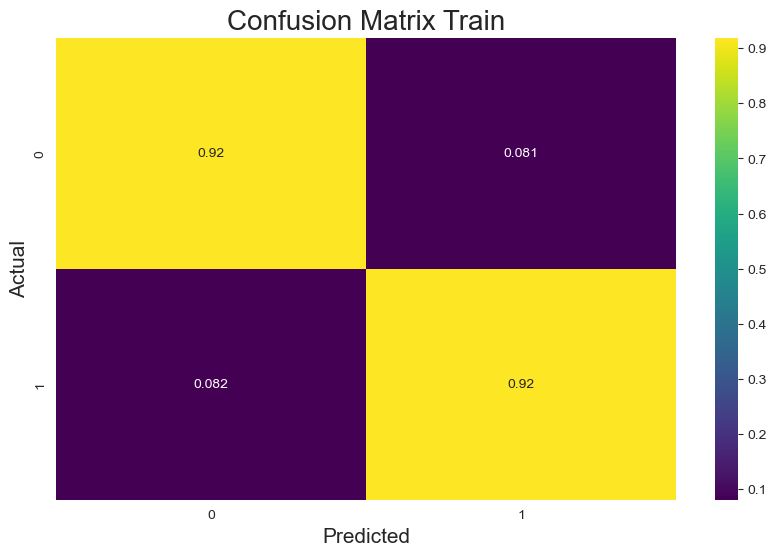

In [74]:
train_svm = pred_and_plot(X_train,  y_train, 'Train')

Accuracy Score :  0.76
Precision Score :  0.8118811881188119
Recall Score :  0.7387387387387387


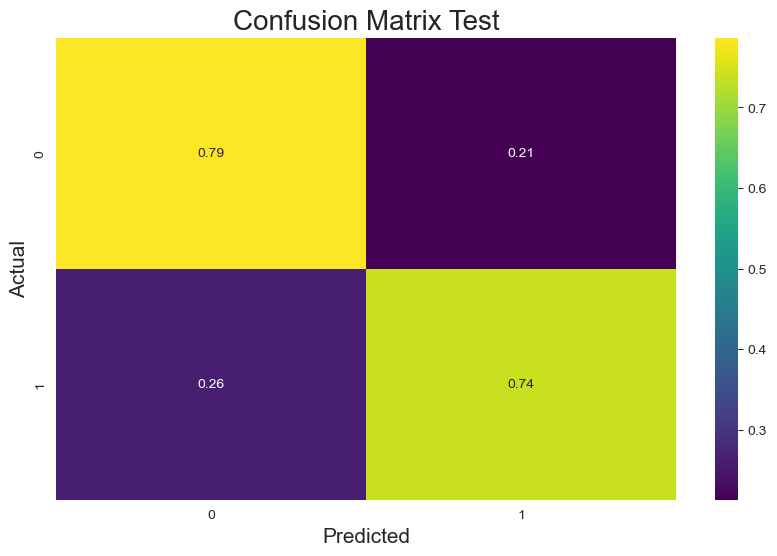

In [75]:
test_svm = pred_and_plot(X_test, y_test, 'Test')

Accuracy Score :  0.7375
Precision Score :  0.7625
Recall Score :  0.7261904761904762


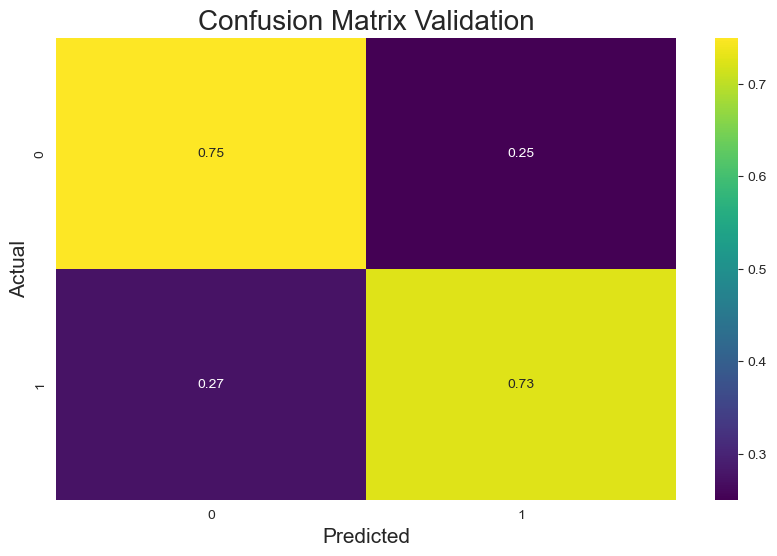

In [76]:
val_svm = pred_and_plot(X_val, y_val, 'Validation')

### Basic Validation

In [77]:
def roc_curve_func(test, predd, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(test, predd)
  roc_auc = roc_auc_score(test, predd)


  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [78]:
y_pred_proba_svm = model_svm.predict_proba(X_train)[:,1]

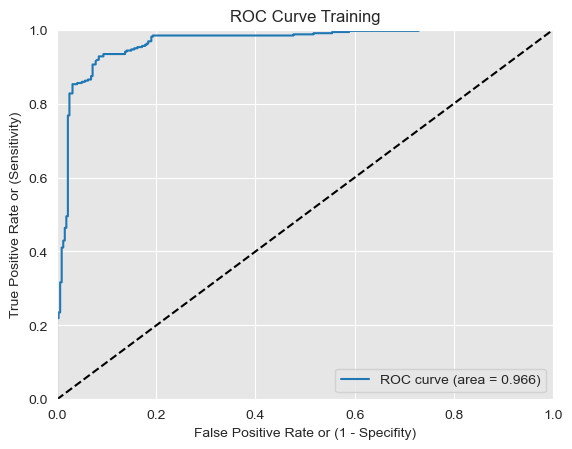

In [79]:
roc_curve_func(y_train,y_pred_proba_svm,'Training')

In [80]:
y_test_pred_proba_svm = model_svm.predict_proba(X_test)[:,1]

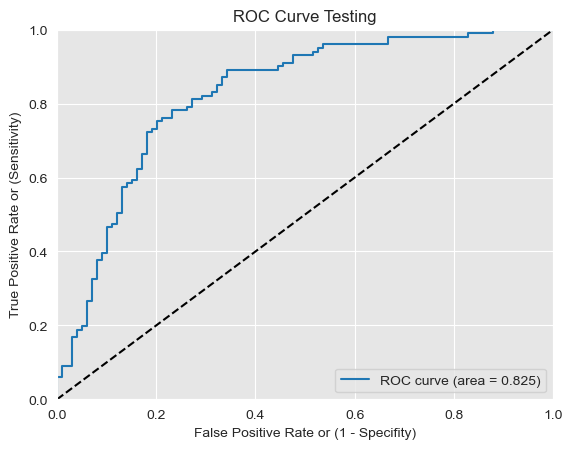

In [81]:
roc_curve_func(y_test, y_test_pred_proba_svm, 'Testing')

In [82]:
print(classification_report(y_test, preds_svm))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74        99
           1       0.74      0.81      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [83]:
# Tingkat Error Model SVM Mae
mae_svm = mean_absolute_error(y_test, preds_svm)
print('Mean Absolute Error  : ', mae_svm)
print('Recall Score         : ',recall_score(y_test, preds_svm))
print('Precision Score      : ', precision_score(y_test, preds_svm))
print('Accuracy Score       : ', accuracy_score(y_test, preds_svm))
print('F1 Score             : ', f1_score(y_test, preds_svm))
print('AuC Score            : ', roc_auc_score(y_test, preds_svm))
print('Roc Curve            : ', roc_curve(y_test, preds_svm))

Mean Absolute Error  :  0.24
Recall Score         :  0.8118811881188119
Precision Score      :  0.7387387387387387
Accuracy Score       :  0.76
F1 Score             :  0.7735849056603774
AuC Score            :  0.7594759475947596
Roc Curve            :  (array([0.        , 0.29292929, 1.        ]), array([0.        , 0.81188119, 1.        ]), array([2, 1, 0], dtype=int64))


## Hyperparameter Tuning
Dengan membandingkan tingkat eror antara model SVM dan Logistict Regresi saya memilih SVM karena model SVM memiliki tingkat eror yang lebih kecil. Maka dari itu saya akan melakukan hyperparameter tuning pada model SVM. Dengan hypermater tuning saya mencoba untuk menaikan nilai recall, precision, dan f1 score dari model SVM.

In [84]:
from sklearn.model_selection import GridSearchCV
param_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(SVC(), param_svm, verbose=3, n_jobs=-1, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=3)

In [85]:
pred_grid_svm = grid_svm.predict(X_test)
pred_grid_svm[-5:]

array([1, 1, 0, 0, 1], dtype=int64)

In [86]:
print(classification_report(y_test, pred_grid_svm))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [87]:
print('Best Parameters  : ', grid_svm.best_params_)
print('Best Score       : ', grid_svm.best_score_)
print('Best Estimator   : ', grid_svm.best_estimator_)
print('Best Index       : ', grid_svm.best_index_)
print('===========================================')
print('Akurasi Model    : ', accuracy_score(pred_grid_svm, y_test))
print('Precision Model  : ', precision_score(pred_grid_svm, y_test))
print('Recall Model     : ', recall_score(pred_grid_svm, y_test))
print('F1 Score Model   : ', f1_score(pred_grid_svm, y_test))

Best Parameters  :  {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Score       :  0.790625
Best Estimator   :  SVC(C=1000, gamma=1)
Best Index       :  40
Akurasi Model    :  0.8
Precision Model  :  0.8415841584158416
Recall Model     :  0.7798165137614679
F1 Score Model   :  0.8095238095238095


Dari hasil hyperparameter tuning yang saya lakukan saya mendapatkan nilai recall, precision, dan f1 score yang lebih tinggi dari model SVM sebelumnya.

In [88]:
# Prediksi Data Baru
preganancies = int(input('Masukkan Jumlah Kehamilan     : '))
glucose = int(input('Masukkan Kadar Glukosa             : '))
blood_pressure = int(input('Masukkan Tekanan Darah      : '))
skin_thickness = int(input('Masukkan Ketebalan Kulit    : '))
insulin = int(input('Masukkan Insulin                   : '))
bmi = float(input('Masukkan BMI                         : '))
diabetes_pedigree_function = float(input('Masukkan Diabetes Pedigree Function : '))
age = int(input('Masukkan Umur                          : '))
data = [[preganancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]]
data

[[1, 20, 23, 23, 23, 45.0, 21.0, 32]]

In [92]:
if grid_svm.predict(data) == 1:
    print('Anda Berpotensi Diabetes')
else:
    print('Anda Tidak Berpotensi Diabetes')

Anda Berpotensi Diabetes


In [90]:
# Save Model SVM ke dalam File Pickle
import pickle
pkl_filename = "model_svm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_svm, file)

# Load Model SVM dari File Pickle
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Prediksi Data Baru dengan Model SVM yang sudah di Load dari File Pickle
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = pickle_model.predict(X_test)
print("Predicted values:")
print(y_predict)

Test score: 76.00 %
Predicted values:
[0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1]
